### Introducción al procesamiento de imágenes

Construya un script que le permita visualizar las imágenes de entrada dentro de un ciclo.

Aplique la binarización por threshold sobre una muestra de sus imágenes de reto. El objetivo es que vea si puede segmentar elementos de interés.

Haga una experimentación sobre la máscara binaria obtenida en el punto 3, utilizando las funciones de erosión y dilatación y analice los resultados.

In [8]:
# pip install opencv-python
# pip install cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
images = [r"IMG1.jpeg", r"IMG2.jpeg"]

In [10]:
def visualize(image):
    img = cv2.imread(img_path)
    cv2.imshow('Imagen', img)
    #Presionar ENTER para continuar
    print(f"Mostrando {img_path}. Presiona 'Enter' para continuar...")
    cv2.waitKey(0)  # Espera hasta que se presione una tecla (0 indica indefinido)

    cv2.destroyAllWindows()

In [11]:
def treshold(image):
    # Leer la imagen en escala de grises
    img = cv2.imread(image, 0)

    # Aplicar binarización con un threshold (por ejemplo, umbral de 127)
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    cv2.imshow('Imagen binarizada', binary_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [12]:
def dilate_erode(image):
    img = cv2.imread(image, 0)

    # Aplicar binarización
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Crear un kernel (una matriz usada para dilatar/erosionar)
    kernel = np.ones((5,5), np.uint8)

    # Aplicar dilatación
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

    # Aplicar erosión
    eroded_img = cv2.erode(binary_img, kernel, iterations=1)


    cv2.imshow('Imagen original', binary_img)
    cv2.imshow('Imagen dilatada', dilated_img)
    cv2.imshow('Imagen erosionada', eroded_img)

    plt.figure(figsize=(15, 5)) 
    
   
    plt.subplot(1, 3, 1)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Imagen Binarizada')
    plt.axis('off')  # Ocultar ejes
    
    
    plt.subplot(1, 3, 2) 
    plt.imshow(dilated_img, cmap='gray')
    plt.title('Imagen Dilatada')
    plt.axis('off')  
    
    
    plt.subplot(1, 3, 3)  
    plt.imshow(eroded_img, cmap='gray')
    plt.title('Imagen Erosionada')
    plt.axis('off') 
    
    plt.show()


    cv2.waitKey(0)
    cv2.destroyAllWindows()

Mostrando IMG1.jpeg. Presiona 'Enter' para continuar...


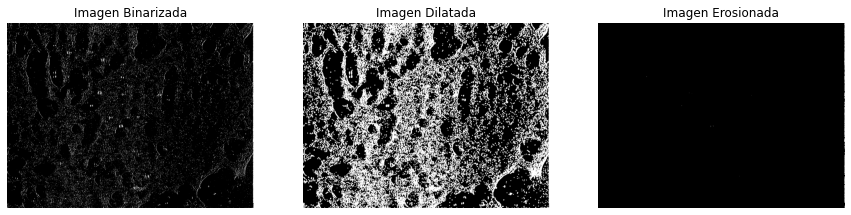

Mostrando IMG2.jpeg. Presiona 'Enter' para continuar...


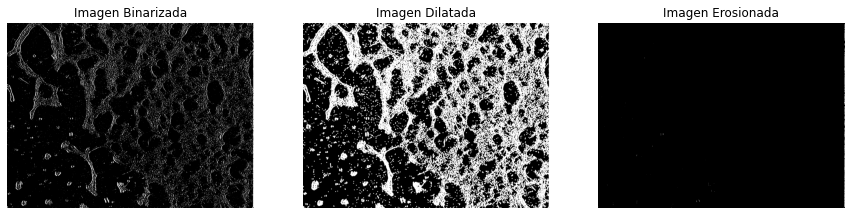

In [13]:
for img_path in images:
   visualize(img_path)
   treshold(img_path)
   dilate_erode(img_path)

<h3>Erosión</h3>
<p>Pued ver que la <strong>erosión</strong> reduce las áreas blancas de la imagen binarizada, lo que provoca que los objetos segmentados se encojan y los detalles más pequeños desaparezcan. Esto elimina el ruido y separa elementos conectados por finas líneas. Sin embargo, si los objetos de interés son demasiado delgados, pueden fragmentarse o desaparecer por completo.</p>

<h3>Dilatación</h3>
<p>Alcanzo a percibir  que la <strong>dilatación</strong> expande las áreas blancas, haciendo que los objetos crezcan y se rellenen los huecos dentro de ellos. Esto puede unir objetos cercanos y reparar discontinuidades. Sin embargo, si los elementos están muy próximos, pueden fusionarse y perderse detalles importantes.</p>